#Results of Traffic Simulation Study

This notebook presents the results of a traffic simulation over a 1km stretch of road with 30 cars.  The cars are modelled to accelerate 2m/s/s up to a max of 34m/s.  Cars will randomly slow by 2m/s/s and also will slow to a speed equal to the distance between themselves and the car in front of them if they approach another car.  The road is one lane and modelled as circular.

In [36]:
from simulation import Simulation
from car import Car
from simulation import n_simulations
import numpy as np


In [37]:
%matplotlib inline

##Run Nine Simulations for Display

In [38]:
nine_simulations = n_simulations(9)

###Show result matrices for first simulation.  The first is the location of cars, the second is speed.

In [39]:
nine_simulations[0]

array([[[  5,  39,  73, ..., 926, 960, 995],
        [  5,  39,  73, ..., 926, 960, 995],
        [  7,  41,  75, ..., 928, 962, 997],
        ..., 
        [610, 749, 782, ..., 537, 554, 573],
        [626, 775, 810, ..., 547, 566, 587],
        [644, 799, 836, ..., 559, 580, 603]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  2,   2,   2, ...,   2,   2,   2],
        [  4,   4,   4, ...,   4,   4,   0],
        ..., 
        [ 16,  26,  28, ...,  10,  12,  14],
        [ 18,  24,  26, ...,  12,  14,  16],
        [ 20,  26,  28, ...,  14,  16,  18]]])

###Show result matrices for last simulation.  The first is the location of cars, the second is speed.

In [40]:
nine_simulations[8]

array([[[  5,  39,  73, ..., 926, 960, 995],
        [  5,  39,  73, ..., 926, 960, 995],
        [  7,  41,  75, ..., 928, 962, 997],
        ..., 
        [643, 748, 781, ..., 568, 591, 612],
        [665, 774, 809, ..., 584, 605, 628],
        [689, 802, 835, ..., 598, 621, 646]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  2,   2,   2, ...,   2,   2,   2],
        [  4,   0,   4, ...,   4,   4,   4],
        ..., 
        [ 22,  26,  28, ...,  16,  14,  16],
        [ 24,  28,  26, ...,  14,  16,  18],
        [ 26,  26,  28, ...,  16,  18,  20]]])

In [41]:
nine_simulations[8][0].shape

(121, 30)

The results matrices are 121 rows by 30 columns.  The first 61 rows are 1 row for setting up the cars and 60 seconds to get cars up to speed.  The rows 61 to 121 are the speeds we will use for analysis.

##Display of 9 Simulations

A scatter plot is the best way to show the cars' movement over time.  The x axis is time, the y axis is location.  As an example, the 9th simulation is displayed below.

To give a recommendation for a new speed limit, take the mean speed of cars in the simulation and add the standard deviation of the speeds.

The first 61 time points set the cars in motion, so the mean of the last 60 data points will be used.

In [42]:
import matplotlib.pyplot as plt

In [43]:
speeds = nine_simulations[8][1][61:]

In [44]:
speeds

array([[22, 24, 26, ..., 12, 14, 16],
       [24, 26, 24, ..., 14, 16, 18],
       [26, 24, 22, ..., 12, 18, 20],
       ..., 
       [22, 26, 28, ..., 16, 14, 16],
       [24, 28, 26, ..., 14, 16, 18],
       [26, 26, 28, ..., 16, 18, 20]])

In [45]:
single_mean = (np.mean(speeds))
print(single_mean)
single_stdev = (np.std(speeds))
print(single_stdev)

15.4611111111
10.3925528298


#Based on data from one simulation, the average speed plus one standard deviation is 25.9 m/s.   This is the recommended speed limit.

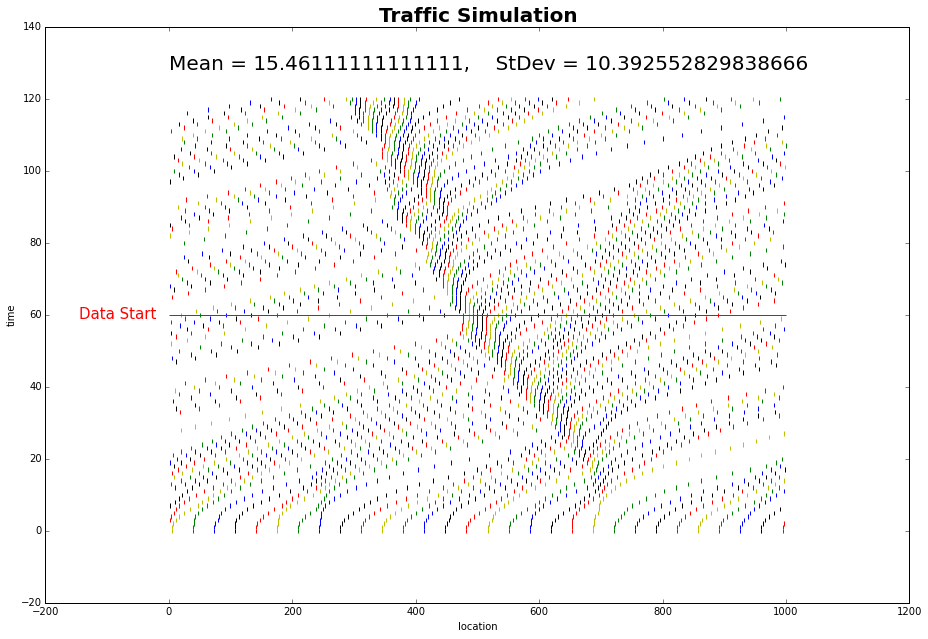

In [48]:
location = nine_simulations[8][0]
y = [[i] * 30 for i in range(121)]
plt.subplots_adjust(left=18, right=20, top=20, bottom=18)
plt.scatter(location, y, marker="|", c = ["y","g","b","k","r"])
#plt.scatter(location_array, times)
plt.xlabel("location")
plt.hlines(60, 0, 1000, color="red")
plt.text( 0, 128, 'Mean = {},    StDev = {}'.format(single_mean, single_stdev), fontsize=20)
plt.text( -145, 59, 'Data Start', fontsize=15, color="red")
plt.ylabel("time")
plt.title("Traffic Simulation", fontsize=20, fontweight='bold')

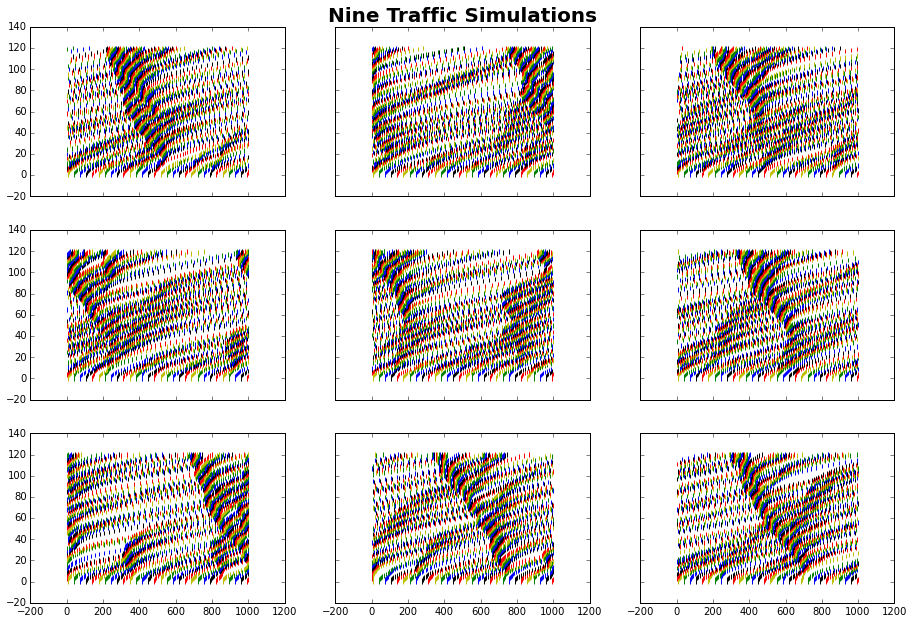

In [49]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex='col', \
                                                                      sharey='row')
plt.subplots_adjust(left=18, right=20, top=20, bottom=18)
y9 = [[i] * 30 for i in range(121)]
locations = [nine_simulations[i][0] for i in range(9)]
ax1.scatter(locations[0], y9, marker="|", c = ["y","g","b","k","r"])
ax2.set_title("Nine Traffic Simulations", fontsize=20, fontweight='bold')
ax2.scatter(locations[1], y9, marker="|", c = ["y","g","b","k","r"])
ax3.scatter(locations[2], y9, marker="|", c = ["y","g","b","k","r"])
ax4.scatter(locations[3], y9, marker="|", c = ["y","g","b","k","r"])
ax5.scatter(locations[4], y9, marker="|", c = ["y","g","b","k","r"])
ax6.scatter(locations[5], y9, marker="|", c = ["y","g","b","k","r"])
ax7.scatter(locations[6], y9, marker="|", c = ["y","g","b","k","r"])
ax8.scatter(locations[7], y9, marker="|", c = ["y","g","b","k","r"])
ax9.scatter(locations[8], y9, marker="|", c = ["y","g","b","k","r"])

In [50]:
speeds = [nine_simulations[i][1][61:] for i in range(len(nine_simulations))]

In [51]:
mean_speeds = [np.mean(speeds[i]) for i in range(len(speeds))]
stdevs = [np.std(speeds[i]) for i in range(len(speeds))]

Next, calculate the mean speeds for the nine simulations.

In [52]:
print(mean_speeds)

[14.801111111111112, 13.664444444444445, 15.693888888888889, 15.465555555555556, 14.760555555555555, 14.363888888888889, 15.688888888888888, 16.026666666666667, 15.46111111111111]


And the standard deviations.

In [53]:
print(stdevs)

[11.752276322714341, 10.794580030028559, 10.935831340084093, 10.753135574861783, 10.136123504148813, 11.189892581595872, 11.119197057785986, 11.130107317042766, 10.392552829838666]


Finally, the mean of the means and the mean of the standard deviations of the 9 simulations

In [54]:
print(np.mean(mean_speeds))
print(np.mean(stdevs))

15.1029012346
10.9115218398


###With nine simulations, the speed limit recommendation would be 26.

##To further analyze the data, 1000 simulations are run to look at the mean of the mean speeds and the mean of the standard deviations.

In [55]:
data_set = n_simulations(1000) 

In [56]:
data_speeds = [data_set[i][1][61:] for i in range(len(data_set))]

In [57]:
data_mean_speeds = [np.mean(data_speeds[i]) for i in range(len(data_speeds))]
data_stdevs = [np.std(data_speeds[i]) for i in range(len(data_speeds))]

Calculate the mean speed over 1000 simulations, and the mean standard deviation.

In [58]:
print(np.mean(data_mean_speeds))
print(np.mean(data_stdevs))

16.6128588889
10.484613341


The speed limit recommendation using this data is 27.1 m/s.

Next lets look at the slowest and fastest mean speed over 1000 trials.

In [59]:
print("Slowest: {}".format(np.min(data_mean_speeds)))
print("Fastest: {}".format(np.max(data_mean_speeds)))

Slowest: 9.855
Fastest: 33.65611111111111


Lastly, we can do a histogram of the mean speeds over 1000 trials.

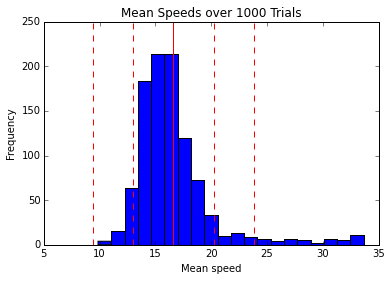

In [60]:
plt.hist(data_mean_speeds, bins = 20)
ymin, ymax = plt.ylim()
mean = np.mean(data_mean_speeds)
stdev = np.std(data_mean_speeds)
plt.vlines(mean, ymin, ymax, color="red")
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, linestyles="dashed", color="red")
plt.xlabel("Mean speed")
plt.ylabel("Frequency")
plt.title("Mean Speeds over 1000 Trials")
plt.show()

#Conclusion
Since the mode of the average is 16, with the second most common average speed being 15, I would suggest making that the base from which you add the standard deviation.  Using this data, a better recommendation would be at 26.4 m/s, using the average standard deviation of 10.4.

##Plotting one trial in 3D: Time/Speed/Location

In [61]:
from mpl_toolkits.mplot3d import Axes3D

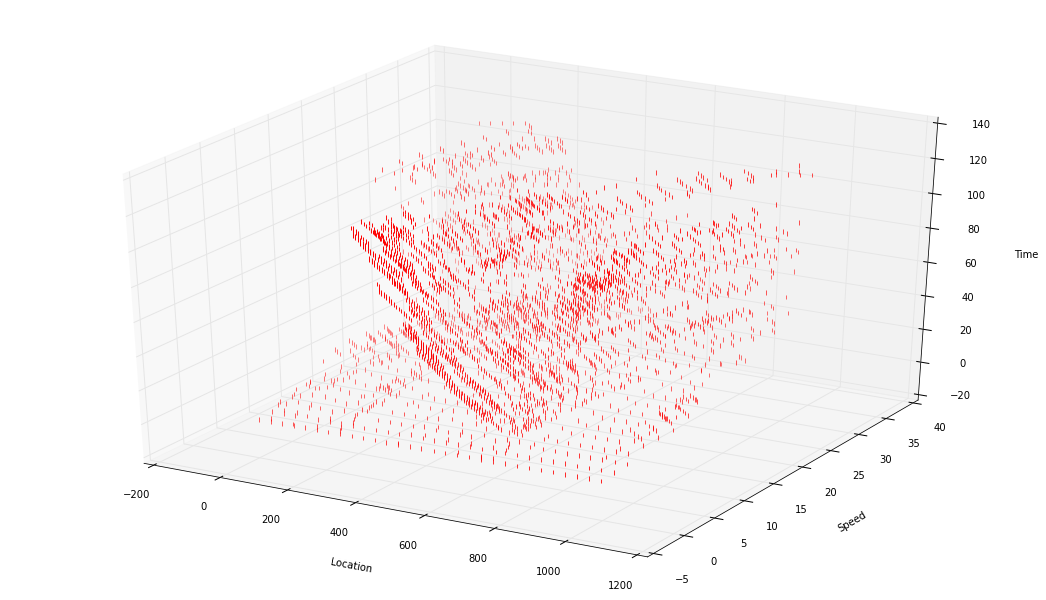

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(18.5,10.5)
x = nine_simulations[8][0]
z = [[i] * 30 for i in range(121)]
y = nine_simulations[8][1]
#plt.subplots_adjust(left=18, right=20, top=20, bottom=18)
#plt.scatter(location, y, marker="|", c = ["y","g","b","k","r"])

ax.scatter(x, y, z, marker="|", c = ["r"])

ax.set_xlabel('Location')
ax.set_zlabel('Time')
ax.set_ylabel('Speed')

plt.show()

##Let's see what happens when we add more cars to the road

Trials with 40 Cars
Mean Speed over 20 Trials: 12.946791666666666
Mean StDev of Speed over 20 Trials: 9.484493965096522


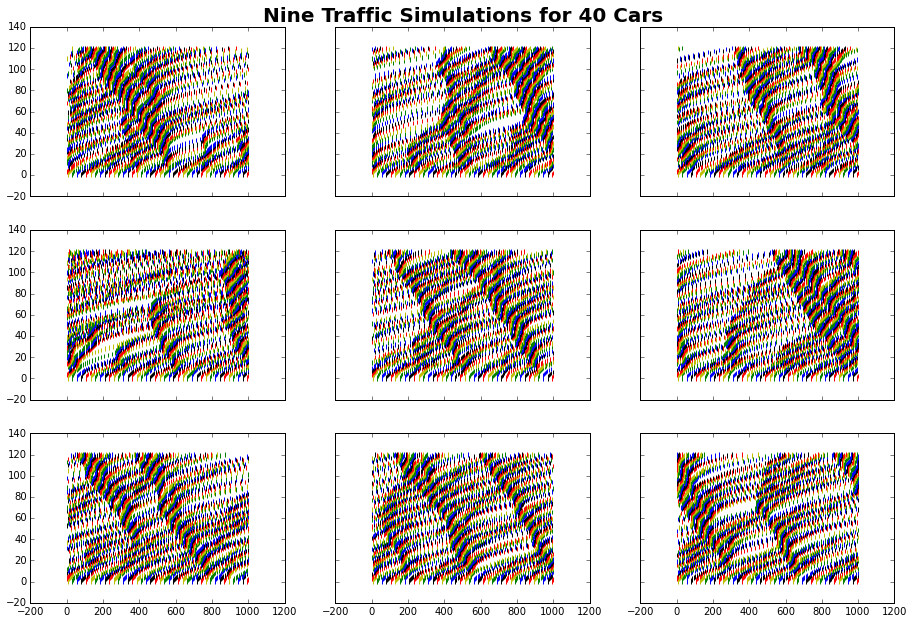

In [69]:
cars = 40
num_sims = 20
nine_simulations = n_simulations(n=num_sims, num_cars=cars)
speeds = [nine_simulations[i][1][61:] for i in range(len(nine_simulations))]
mean_speeds = [np.mean(speeds[i]) for i in range(len(speeds))]
stdevs = [np.std(speeds[i]) for i in range(len(speeds))]
print("Trials with {} Cars".format(cars))
print("Mean Speed over {} Trials: {}".format(num_sims, np.mean(mean_speeds)))
print("Mean StDev of Speed over {} Trials: {}".format(num_sims, np.mean(stdevs)))
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex='col', \
                                                                      sharey='row')
plt.subplots_adjust(left=18, right=20, top=20, bottom=18)
y9 = [[i] * cars for i in range(121)]
locations = [nine_simulations[i][0] for i in range(9)]
ax1.scatter(locations[0], y9, marker="|", c = ["y","g","b","k","r"])
ax2.set_title("Nine Traffic Simulations for {} Cars".format(cars), \
              fontsize=20, fontweight='bold')
ax2.scatter(locations[1], y9, marker="|", c = ["y","g","b","k","r"])
ax3.scatter(locations[2], y9, marker="|", c = ["y","g","b","k","r"])
ax4.scatter(locations[3], y9, marker="|", c = ["y","g","b","k","r"])
ax5.scatter(locations[4], y9, marker="|", c = ["y","g","b","k","r"])
ax6.scatter(locations[5], y9, marker="|", c = ["y","g","b","k","r"])
ax7.scatter(locations[6], y9, marker="|", c = ["y","g","b","k","r"])
ax8.scatter(locations[7], y9, marker="|", c = ["y","g","b","k","r"])
ax9.scatter(locations[8], y9, marker="|", c = ["y","g","b","k","r"])

Trials with 50 Cars
Mean Speed over 100 Trials: 10.206583333333333
Mean StDev of Speed over 100 Trials: 8.231101378653864


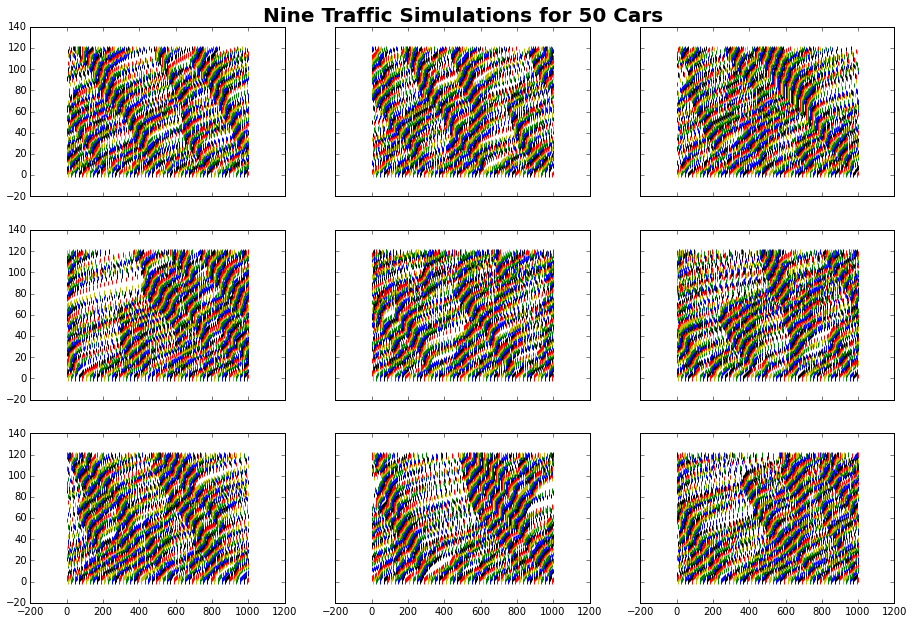

In [78]:
cars = 50
num_sims = 100
nine_simulations = n_simulations(n=num_sims, num_cars=cars)
speeds = [nine_simulations[i][1][61:] for i in range(len(nine_simulations))]
mean_speeds = [np.mean(speeds[i]) for i in range(len(speeds))]
stdevs = [np.std(speeds[i]) for i in range(len(speeds))]
print("Trials with {} Cars".format(cars))
print("Mean Speed over {} Trials: {}".format(num_sims, np.mean(mean_speeds)))
print("Mean StDev of Speed over {} Trials: {}".format(num_sims, np.mean(stdevs)))
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex='col', \
                                                                      sharey='row')
plt.subplots_adjust(left=18, right=20, top=20, bottom=18)
y9 = [[i] * cars for i in range(121)]
locations = [nine_simulations[i][0] for i in range(9)]
ax1.scatter(locations[0], y9, marker="|", c = ["y","g","b","k","r"])
ax2.set_title("Nine Traffic Simulations for {} Cars".format(cars), \
              fontsize=20, fontweight='bold')
ax2.scatter(locations[1], y9, marker="|", c = ["y","g","b","k","r"])
ax3.scatter(locations[2], y9, marker="|", c = ["y","g","b","k","r"])
ax4.scatter(locations[3], y9, marker="|", c = ["y","g","b","k","r"])
ax5.scatter(locations[4], y9, marker="|", c = ["y","g","b","k","r"])
ax6.scatter(locations[5], y9, marker="|", c = ["y","g","b","k","r"])
ax7.scatter(locations[6], y9, marker="|", c = ["y","g","b","k","r"])
ax8.scatter(locations[7], y9, marker="|", c = ["y","g","b","k","r"])
ax9.scatter(locations[8], y9, marker="|", c = ["y","g","b","k","r"])

Trials with 60 Cars
Mean Speed over 100 Trials: 8.36816388888889
Mean StDev of Speed over 100 Trials: 7.354241230287803


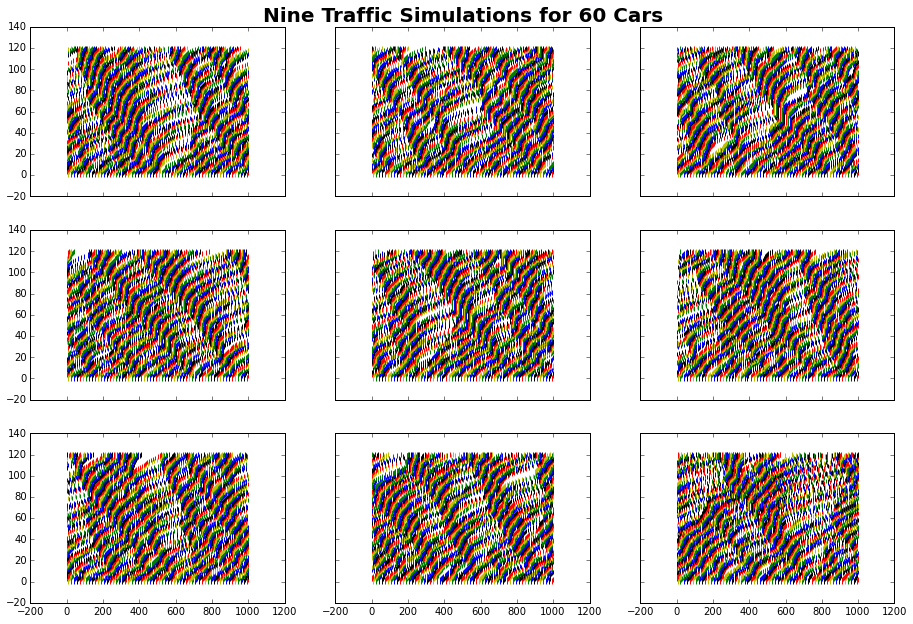

In [77]:
cars = 60
num_sims = 100
nine_simulations = n_simulations(n=num_sims, num_cars=cars)
speeds = [nine_simulations[i][1][61:] for i in range(len(nine_simulations))]
mean_speeds = [np.mean(speeds[i]) for i in range(len(speeds))]
stdevs = [np.std(speeds[i]) for i in range(len(speeds))]
print("Trials with {} Cars".format(cars))
print("Mean Speed over {} Trials: {}".format(num_sims, np.mean(mean_speeds)))
print("Mean StDev of Speed over {} Trials: {}".format(num_sims, np.mean(stdevs)))
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex='col', \
                                                                      sharey='row')
plt.subplots_adjust(left=18, right=20, top=20, bottom=18)
y9 = [[i] * cars for i in range(121)]
locations = [nine_simulations[i][0] for i in range(9)]
ax1.scatter(locations[0], y9, marker="|", c = ["y","g","b","k","r"])
ax2.set_title("Nine Traffic Simulations for {} Cars".format(cars), \
              fontsize=20, fontweight='bold')
ax2.scatter(locations[1], y9, marker="|", c = ["y","g","b","k","r"])
ax3.scatter(locations[2], y9, marker="|", c = ["y","g","b","k","r"])
ax4.scatter(locations[3], y9, marker="|", c = ["y","g","b","k","r"])
ax5.scatter(locations[4], y9, marker="|", c = ["y","g","b","k","r"])
ax6.scatter(locations[5], y9, marker="|", c = ["y","g","b","k","r"])
ax7.scatter(locations[6], y9, marker="|", c = ["y","g","b","k","r"])
ax8.scatter(locations[7], y9, marker="|", c = ["y","g","b","k","r"])
ax9.scatter(locations[8], y9, marker="|", c = ["y","g","b","k","r"])

Trials with 70 Cars
Mean Speed over 100 Trials: 8.0212
Mean StDev of Speed over 100 Trials: 7.856053063835234


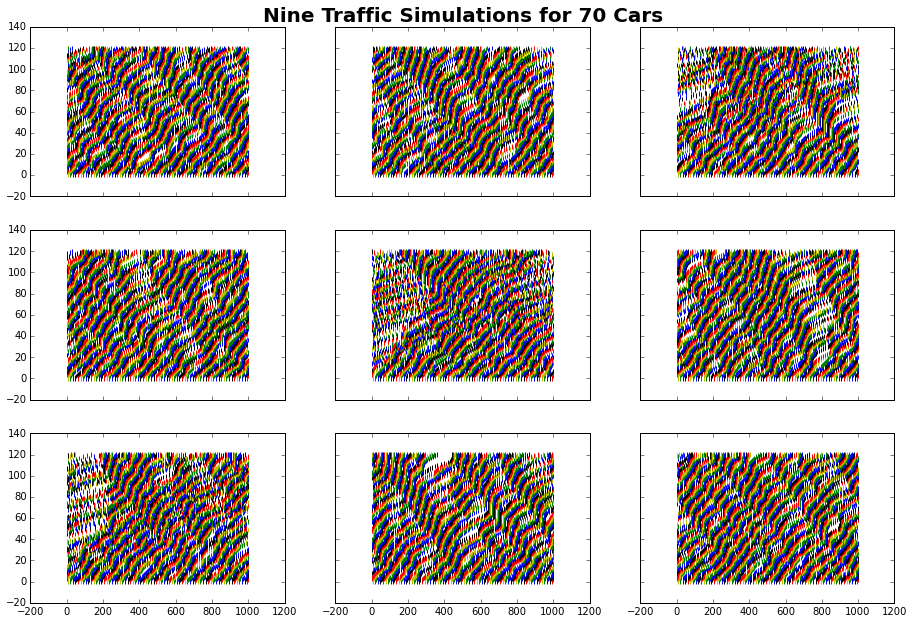

In [79]:
cars = 70
num_sims = 100
nine_simulations = n_simulations(n=num_sims, num_cars=cars)
speeds = [nine_simulations[i][1][61:] for i in range(len(nine_simulations))]
mean_speeds = [np.mean(speeds[i]) for i in range(len(speeds))]
stdevs = [np.std(speeds[i]) for i in range(len(speeds))]
print("Trials with {} Cars".format(cars))
print("Mean Speed over {} Trials: {}".format(num_sims, np.mean(mean_speeds)))
print("Mean StDev of Speed over {} Trials: {}".format(num_sims, np.mean(stdevs)))
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex='col', \
                                                                      sharey='row')
plt.subplots_adjust(left=18, right=20, top=20, bottom=18)
y9 = [[i] * cars for i in range(121)]
locations = [nine_simulations[i][0] for i in range(9)]
ax1.scatter(locations[0], y9, marker="|", c = ["y","g","b","k","r"])
ax2.set_title("Nine Traffic Simulations for {} Cars".format(cars), \
              fontsize=20, fontweight='bold')
ax2.scatter(locations[1], y9, marker="|", c = ["y","g","b","k","r"])
ax3.scatter(locations[2], y9, marker="|", c = ["y","g","b","k","r"])
ax4.scatter(locations[3], y9, marker="|", c = ["y","g","b","k","r"])
ax5.scatter(locations[4], y9, marker="|", c = ["y","g","b","k","r"])
ax6.scatter(locations[5], y9, marker="|", c = ["y","g","b","k","r"])
ax7.scatter(locations[6], y9, marker="|", c = ["y","g","b","k","r"])
ax8.scatter(locations[7], y9, marker="|", c = ["y","g","b","k","r"])
ax9.scatter(locations[8], y9, marker="|", c = ["y","g","b","k","r"])